# HR Analytics Project- Understanding the Attrition in HR
# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/swrrocky17/MachineLearning/master/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We need to perform set_option first.This is important as we are not able to see all columns, it will be very helpful for us during data analysis

In [3]:
pd. set_option('display.max_columns', None)

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Check for null
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Check Categorical Columns

In [8]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# Check for Duplicates

In [9]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The above data is the organisation where different age of group are present with what is theri daily rate, whether they stay close to office or far, their level of education, whether they are satisfied or not,monthly income, their past records as in how many companies they have worked.

The data further shows what was their previous salary hike in percentage,performance rating,whether they were awarded with Stock options, their total experience in years, past record of training within the Organisation.From how many years they are in the Current role, how many years they are associated with the company,when were they last promoted and from how many years an employee is working with their current manager

# Begining of the Analysis
We will begin our Analysis by analysing each and every column very carefully without missing any single detail of the data

# Attrition
Lets begin with our target data Attrition, throgh which we will check if the employee has left the Organisation or currently working in.

In [11]:
print('Count of Employees')
attrition_counts = df['Attrition'].value_counts()
attrition_counts

Count of Employees


No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
#Percentage of Employees who left the organisation
percent_left=(237/1470)*100
percent_left

16.122448979591837

<AxesSubplot:xlabel='Attrition', ylabel='count'>

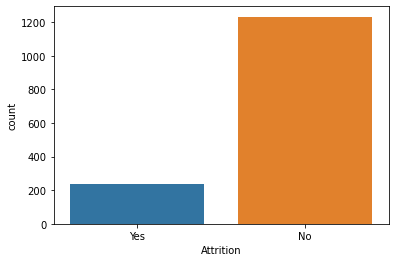

In [13]:
sns.countplot(df['Attrition'])

The attrition rate of the employeee within the Organisation is 16.12%, and the dataset is Imbalanced. We will have to deal with this going further using SMOTE

# Attrition with Age
We see that minimum age of the person working in the organisation is 18 and maximum is those who are close to retirement. But majority of the employees falls in the range of 18 to 43 years. 

In [14]:
#Map No to 0 and Yes to 1
attritions = {"No": 0, "Yes": 1}
data = [df]

for dataset in data:
    dataset['Attrition'] = dataset['Attrition'].map(attritions)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

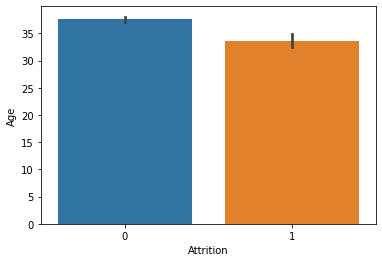

In [15]:
sns.barplot(x="Attrition",y="Age",data=df)

The graph show that the person whose ages are more, their attrition rate is low. Lets create a column No_Attrition and do further analysis with Age and other columns. This will give us detailed information of how many people with what Age left the organisation and who stayed in.

In [16]:
df['No_Attrition'] = 1 - df['Attrition']
df['Total']=df['Attrition']+df['No_Attrition']
df.groupby('Age').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
Age,,,
18,4,4,8
19,6,3,9
20,6,5,11
21,6,7,13
22,5,11,16
23,4,10,14
24,7,19,26
25,6,20,26
26,12,27,39


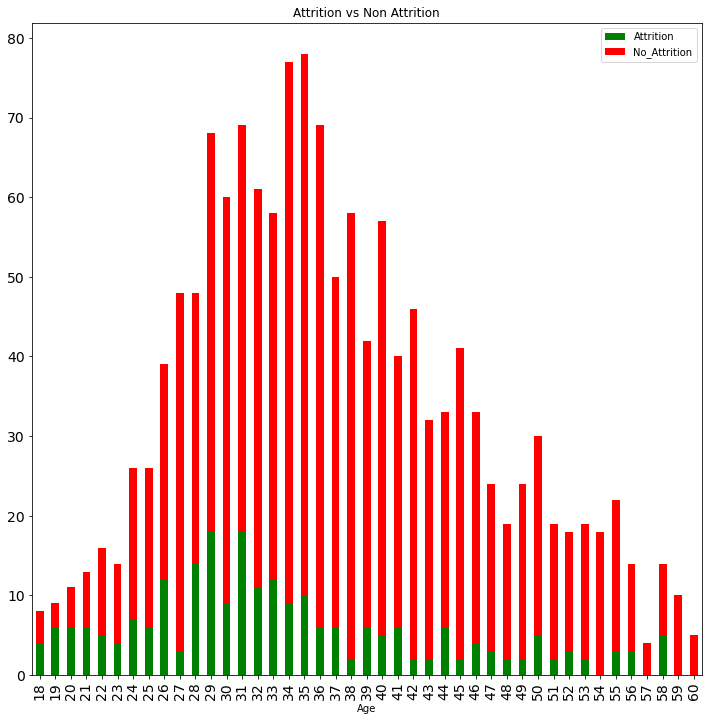

In [17]:
df.groupby('Age').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(12,12),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition");

The graph in left shows that the employee has not left the organisation and green shows that person has left the Organisation.
We see person whose age are between 57 to 60, only five  with age 58 has left the organisation, there can be factors that they would have taken early retirement at age of 58. Apart from this there was no attrition at this afe range of 57-60.
Also,the attrition rate of freshers are more than those of experienced employeed. The employees whose age are mor than 40, the attrition rate drop further compared to employees with afe between 25-41. We will continue to do Feature engineering on other columns leading to attrition now

In [18]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No_Attrition,Total
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1


# Attrition with Business Travel History

In [19]:
set(df['BusinessTravel'])

{'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}

An employee either travel very frequently, or travel rarely, and there are some who never travelled. So we will analyse whether is this any factor contirbuting in attrition

In [20]:
print('Business Travel History of Employees')
attrition_counts = df['BusinessTravel'].value_counts()
attrition_counts

Business Travel History of Employees


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Most of the employees travelled rarely nd few of them travel frequently, and 150 of them never travelled at all

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

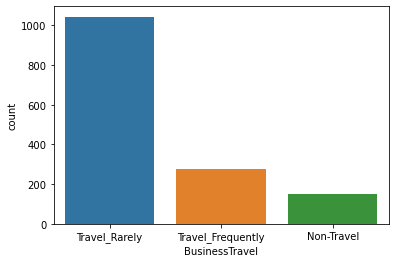

In [21]:
sns.countplot(df['BusinessTravel'])

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

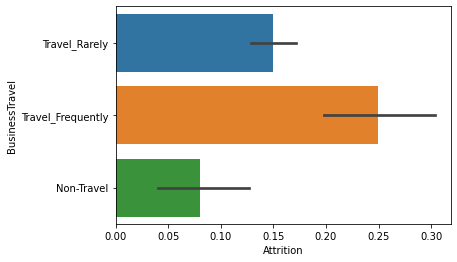

In [22]:
sns.barplot(x="Attrition",y="BusinessTravel",data=df)

In [23]:
df.groupby('BusinessTravel').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
BusinessTravel,,,
Non-Travel,12,138,150
Travel_Frequently,69,208,277
Travel_Rarely,156,887,1043


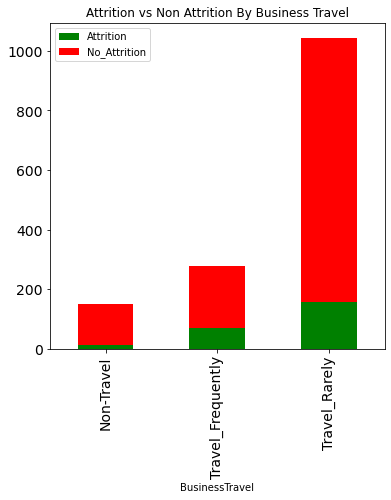

In [24]:
df.groupby('BusinessTravel').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Business Travel");

Analysis says that maximum percentage of attrition happened where the employee travelled very frequently, more than 24% is the attrition rate

# Attrition with Department

In [25]:
set(df['Department']) 

{'Human Resources', 'Research & Development', 'Sales'}

<AxesSubplot:xlabel='Department', ylabel='count'>

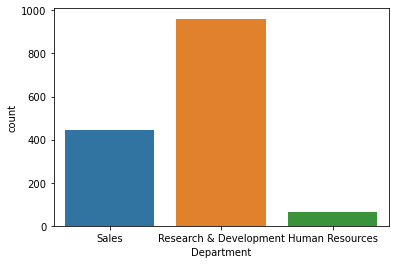

In [26]:
sns.countplot(df['Department'])

In [27]:
print('Count of Departments')
attrition_counts = df['Department'].value_counts()
attrition_counts

Count of Departments


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='Department'>

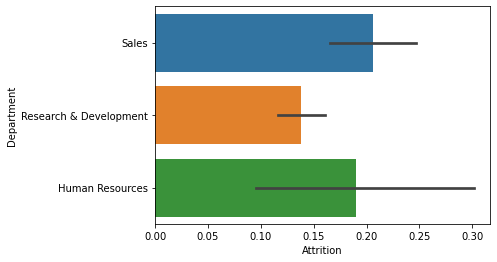

In [28]:
sns.barplot(x="Attrition",y="Department",data=df)

In [29]:
df.groupby('Department').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
Department,,,
Human Resources,12,51,63
Research & Development,133,828,961
Sales,92,354,446


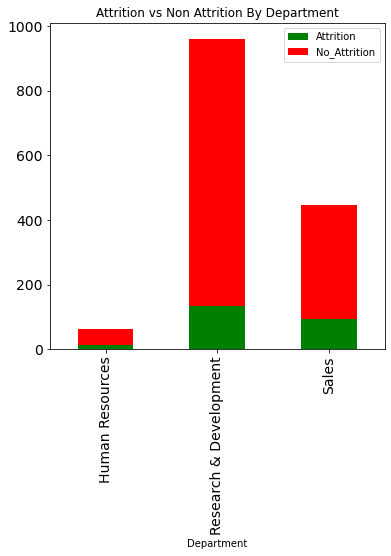

In [30]:
df.groupby('Department').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Department");

Maximum percentage of Attrition happend in Sale (more than 20%), followed by HR department (more than 19%) and then 16% in Research and Development

In [31]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No_Attrition,Total
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1


In [32]:
#set(df['DistanceFromHome'])
df.groupby('DistanceFromHome').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
DistanceFromHome,,,
1,26,182,208
2,28,183,211
3,14,70,84
4,9,55,64
5,10,55,65
6,7,52,59
7,11,73,84
8,10,70,80
9,18,67,85


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

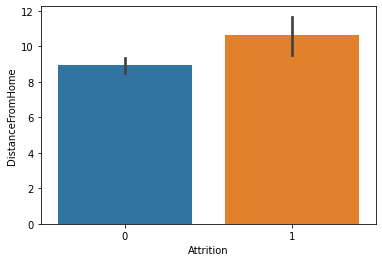

In [33]:
sns.barplot(x="Attrition",y="DistanceFromHome",data=df)

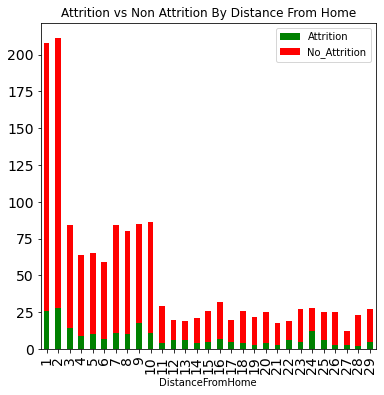

In [34]:
df.groupby('DistanceFromHome').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Distance From Home");

For few employees in the Organisation, Distance from home can be one of the factor but not major factor for attrition

In [35]:
df.groupby('Education').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
Education,,,
1,31,139,170
2,44,238,282
3,99,473,572
4,58,340,398
5,5,43,48


<AxesSubplot:xlabel='Attrition', ylabel='Education'>

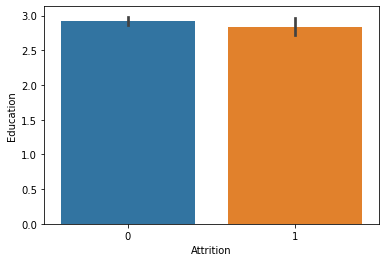

In [36]:
sns.barplot(x="Attrition",y="Education",data=df)

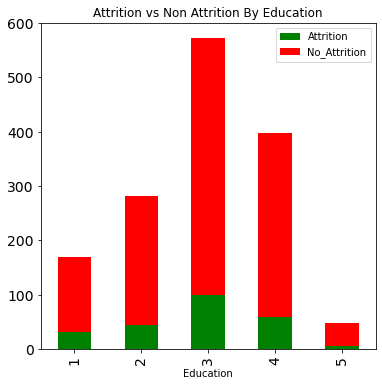

In [37]:
df.groupby('Education').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Education");

In our case, Education is defined as 1,2,3,4 and 5, here 1 means Below college as there are employees of 18 years of Age also,
2 means College level, 3 means Bachelors in their field, 4 means the employees who have completed masters in their field and 5 means the employees who have completed doctorate in their field.

The maximum number of employee who left the organisation is the one who did bachelors and who have not even been enrolled to college,then followed by Masters

In [38]:
df.groupby('EducationField').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
EducationField,,,
Human Resources,7,20,27
Life Sciences,89,517,606
Marketing,35,124,159
Medical,63,401,464
Other,11,71,82
Technical Degree,32,100,132


<AxesSubplot:xlabel='Attrition', ylabel='EducationField'>

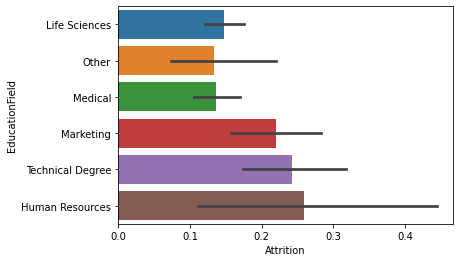

In [39]:
sns.barplot(x="Attrition",y="EducationField",data=df)

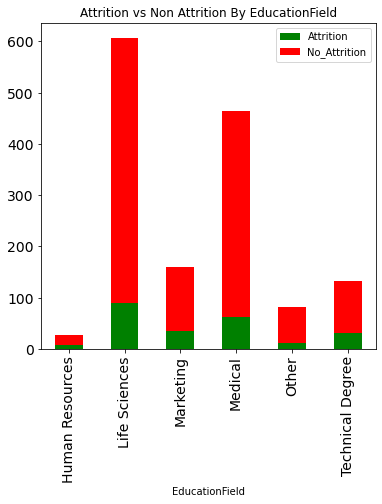

In [40]:
df.groupby('EducationField').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By EducationField");

We see that maximum attrition from the Education field Human Resources, followed with Technical Degree and marketing

In [41]:
#EnvironmentSatisfaction
df.groupby('EnvironmentSatisfaction').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
EnvironmentSatisfaction,,,
1,72,212,284
2,43,244,287
3,62,391,453
4,60,386,446


<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

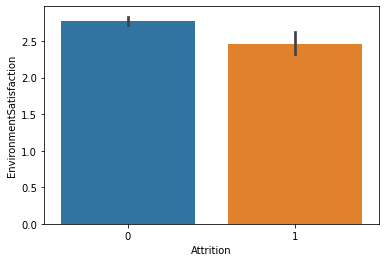

In [42]:
sns.barplot(x="Attrition",y="EnvironmentSatisfaction",data=df)

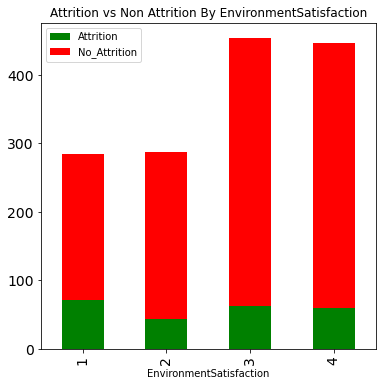

In [43]:
df.groupby('EnvironmentSatisfaction').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By EnvironmentSatisfaction");

Lets convert the EnvironmentSatisfaction into Low, Medium,High and very high. More than 25% attrition rate is because the employees find the envirnment satisfaction as low.

In [44]:
df.groupby('Gender').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
Gender,,,
Female,87,501,588
Male,150,732,882


<AxesSubplot:xlabel='Attrition', ylabel='Gender'>

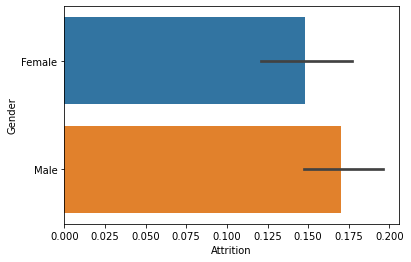

In [45]:
sns.barplot(x="Attrition",y="Gender",data=df)

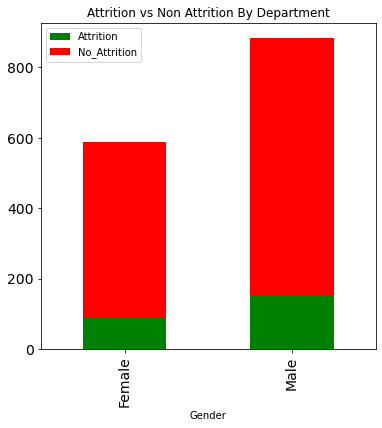

In [46]:
df.groupby('Gender').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Department");

The attrition rate by female is 14% and Male is 17%, so Gender is not a major factor for attrition in the company. We see that there is no gender biasness within the organisation. 

In [47]:
df.groupby('JobInvolvement').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
JobInvolvement,,,
1,28,55,83
2,71,304,375
3,125,743,868
4,13,131,144


<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

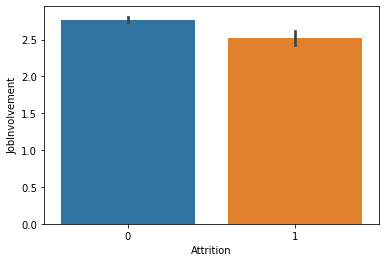

In [48]:
sns.barplot(x="Attrition",y="JobInvolvement",data=df)

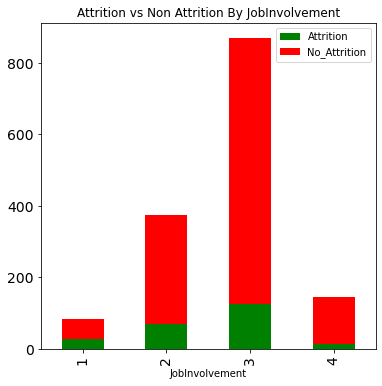

In [49]:
df.groupby('JobInvolvement').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By JobInvolvement");

Lets convert the JobInvolvement into Low, Medium,High and very high. More than 33% attrition rate is because the employees find low job involvement. And for employees whose job involvement are high, they are very rare to leave the organisation

In [50]:
df.groupby('JobLevel').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
JobLevel,,,
1,143,400,543
2,52,482,534
3,32,186,218
4,5,101,106
5,5,64,69


<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

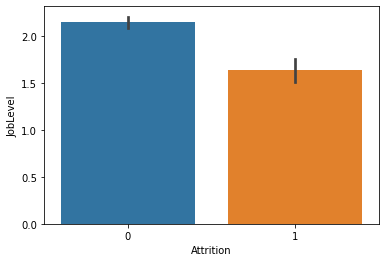

In [51]:
sns.barplot(x="Attrition",y="JobLevel",data=df)

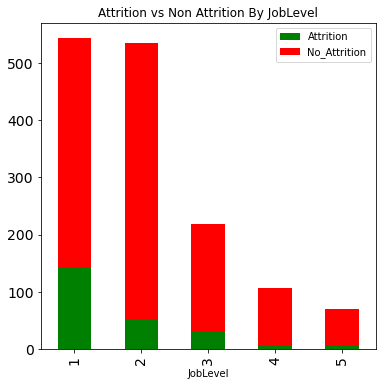

In [52]:
df.groupby('JobLevel').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By JobLevel");

Job level in the company at a sacale of 1-5, 26% attrition rate are the employees whose Joblevel is beginer or freshers. We dont see much attrition in the employees with high job levels

In [53]:
df.groupby('JobRole').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
JobRole,,,
Healthcare Representative,9,122,131
Human Resources,12,40,52
Laboratory Technician,62,197,259
Manager,5,97,102
Manufacturing Director,10,135,145
Research Director,2,78,80
Research Scientist,47,245,292
Sales Executive,57,269,326
Sales Representative,33,50,83


<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

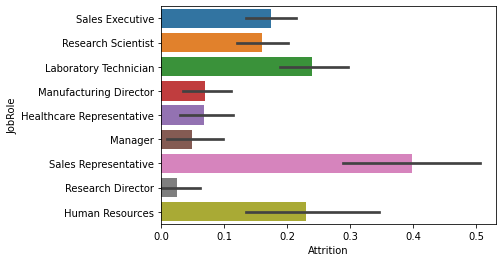

In [54]:
sns.barplot(x="Attrition",y="JobRole",data=df)

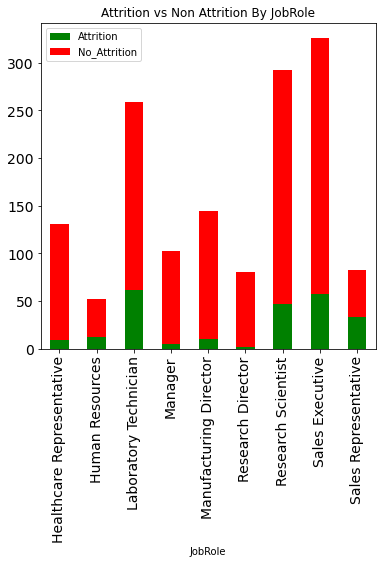

In [55]:
df.groupby('JobRole').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By JobRole");

The maximum attrition is in the Job role of Sales Representatives, Human resources and Laboratory Technician also contribute much to the attrition rate of the organisation.

In [56]:
df.groupby('JobSatisfaction').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
JobSatisfaction,,,
1,66,223,289
2,46,234,280
3,73,369,442
4,52,407,459


<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

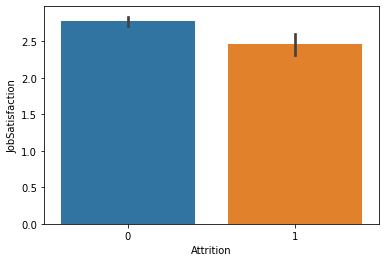

In [57]:
sns.barplot(x="Attrition",y="JobSatisfaction",data=df)

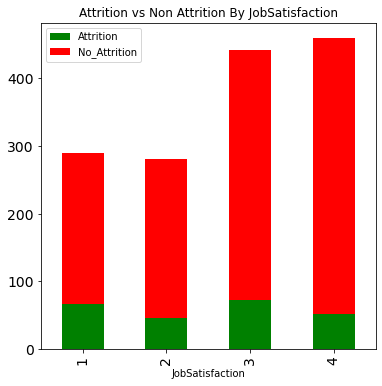

In [58]:
df.groupby('JobSatisfaction').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By JobSatisfaction");

The employees who are extremely less satisfied are the one who leave the orgaisation first. The reason can be enviroment satisfaction and the job role or no onsite oppurtunities

In [59]:
df.groupby('MaritalStatus').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
MaritalStatus,,,
Divorced,33,294,327
Married,84,589,673
Single,120,350,470


<AxesSubplot:xlabel='Attrition', ylabel='MaritalStatus'>

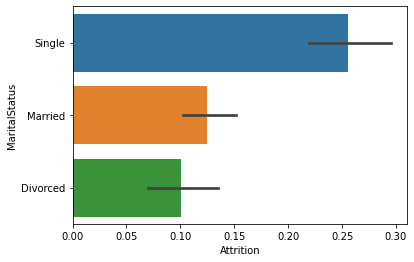

In [60]:
sns.barplot(x="Attrition",y="MaritalStatus",data=df)

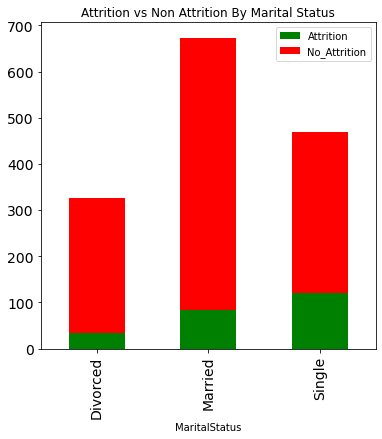

In [61]:
df.groupby('MaritalStatus').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By Marital Status");

The employees who are Single contribute much to the attrition, They can be the ones who are just beginer or college students.

In [62]:
set(df['NumCompaniesWorked'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [63]:
df.groupby('NumCompaniesWorked').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
NumCompaniesWorked,,,
0,23,174,197
1,98,423,521
2,16,130,146
3,16,143,159
4,17,122,139
5,16,47,63
6,16,54,70
7,17,57,74
8,6,43,49


<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

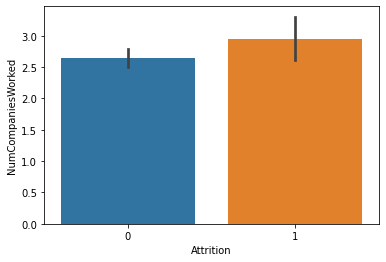

In [64]:
sns.barplot(x="Attrition",y="NumCompaniesWorked",data=df)

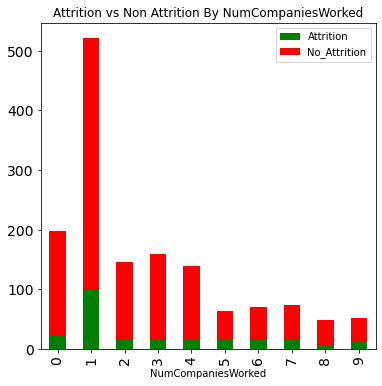

In [65]:
df.groupby('NumCompaniesWorked').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By NumCompaniesWorked");

The employees who have worked in more number of Organisation are the one who look for changes frequently

In [66]:
df.groupby('OverTime').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
OverTime,,,
No,110,944,1054
Yes,127,289,416


<AxesSubplot:xlabel='Attrition', ylabel='OverTime'>

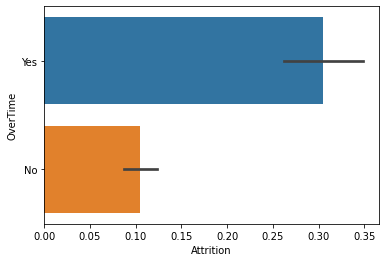

In [67]:
sns.barplot(x="Attrition",y="OverTime",data=df)

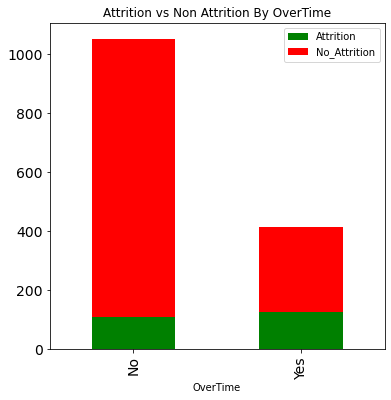

In [68]:
df.groupby('OverTime').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By OverTime");

Most of the employees dont want to do Overtime, hence they leave the organisation, Probably they look for work-life balance or other factors, which HR or reporting manager should speak to them

In [69]:
df.groupby('PercentSalaryHike').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
PercentSalaryHike,,,
11,41,169,210
12,33,165,198
13,34,175,209
14,24,177,201
15,18,83,101
16,14,64,78
17,14,68,82
18,13,76,89
19,9,67,76


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

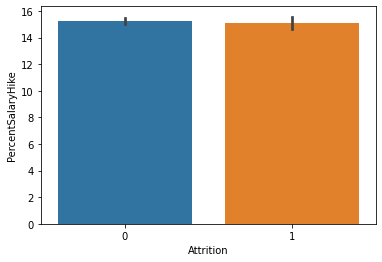

In [70]:
sns.barplot(x="Attrition",y="PercentSalaryHike",data=df)

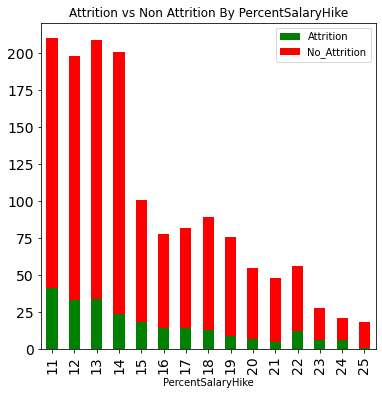

In [71]:
df.groupby('PercentSalaryHike').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By PercentSalaryHike");

Percentage Hike cannot be a mjaor contribution in the rate of attrition as the dataset is balanced for the employeed leaving to organisation and staying with the organisation due to Percentage Hike

In [72]:
df.groupby('PerformanceRating').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
PerformanceRating,,,
3,200,1044,1244
4,37,189,226


<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

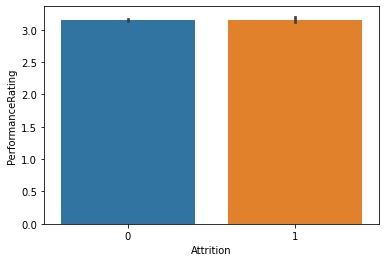

In [73]:
sns.barplot(x="Attrition",y="PerformanceRating",data=df)

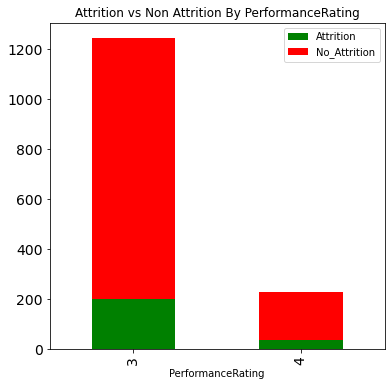

In [74]:
df.groupby('PerformanceRating').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By PerformanceRating");

Performance rating cannot be a mjaor contribution in the rate of attrition as the dataset is balanced for the employeed leaving to organisation and staying with the organisation due to Performance rating 

In [75]:
df.groupby('RelationshipSatisfaction').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
RelationshipSatisfaction,,,
1,57,219,276
2,45,258,303
3,71,388,459
4,64,368,432


<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

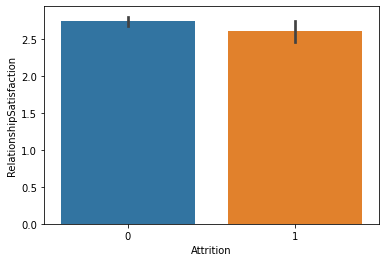

In [76]:
sns.barplot(x="Attrition",y="RelationshipSatisfaction",data=df)

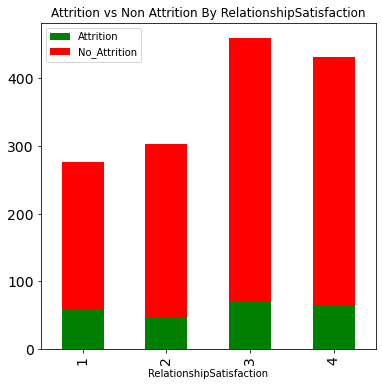

In [77]:
df.groupby('RelationshipSatisfaction').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By RelationshipSatisfaction");

Less the RelationshipSatisfaction more is the attrition as 25% of the attrition is where the RelationshipSatisfaction is low

In [78]:
df.groupby('TrainingTimesLastYear').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
TrainingTimesLastYear,,,
0,15,39,54
1,9,62,71
2,98,449,547
3,69,422,491
4,26,97,123
5,14,105,119
6,6,59,65


<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

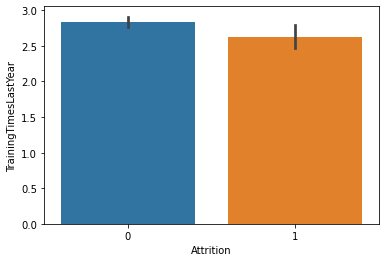

In [79]:
sns.barplot(x="Attrition",y="TrainingTimesLastYear",data=df)

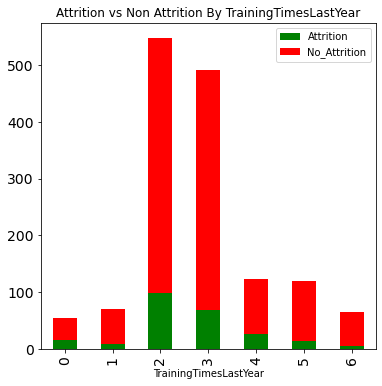

In [80]:
df.groupby('TrainingTimesLastYear').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By TrainingTimesLastYear");

Looks like the employee who have got least training, 6 in this case are the ones who leave the organisation first

In [81]:
df.groupby('WorkLifeBalance').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
WorkLifeBalance,,,
1,25,55,80
2,58,286,344
3,127,766,893
4,27,126,153


<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

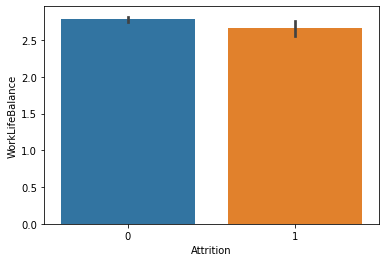

In [82]:
sns.barplot(x="Attrition",y="WorkLifeBalance",data=df)

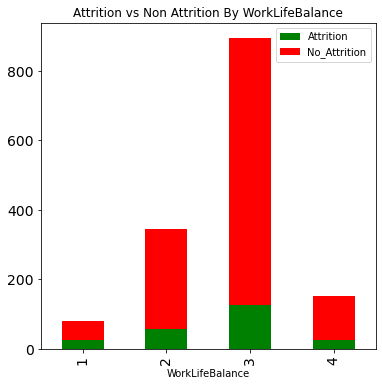

In [83]:
df.groupby('WorkLifeBalance').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By WorkLifeBalance");

31% of the attrition is because the employees are not satisfied because of work life balance, reasons can be work pressure or overtime

In [84]:
df.groupby('YearsAtCompany').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
YearsAtCompany,,,
0,16,28,44
1,59,112,171
2,27,100,127
3,20,108,128
4,19,91,110
5,21,175,196
6,9,67,76
7,11,79,90
8,9,71,80


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

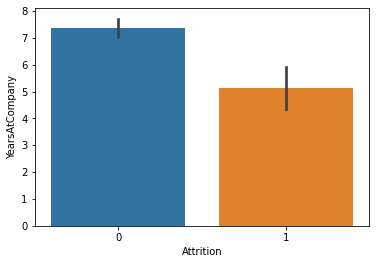

In [85]:
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)

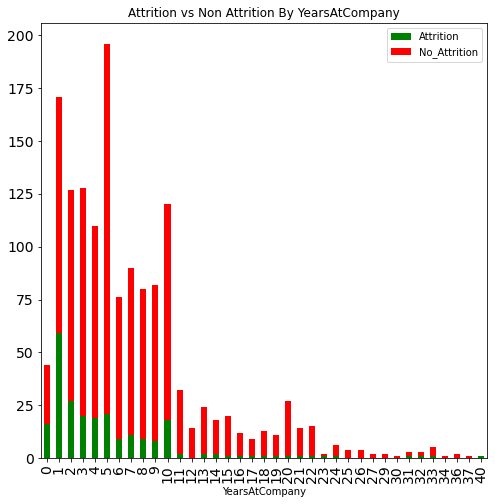

In [86]:
df.groupby('YearsAtCompany').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(8,8),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By YearsAtCompany");

The employees who are associated with the organisation in long run are very less likely to leave the organisation.

In [87]:
#YearsInCurrentRole
df.groupby('YearsInCurrentRole').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
YearsInCurrentRole,,,
0,73,171,244
1,11,46,57
2,68,304,372
3,16,119,135
4,15,89,104
5,1,35,36
6,2,35,37
7,31,191,222
8,7,82,89


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

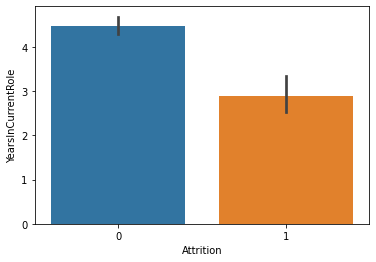

In [88]:
sns.barplot(x="Attrition",y="YearsInCurrentRole",data=df)

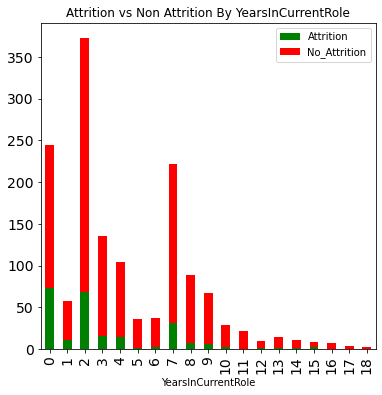

In [89]:
#YearsInCurrentRole
df.groupby('YearsInCurrentRole').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By YearsInCurrentRole");

Looks like the employees whose current roles are not changed are well satisfied with it, they are less likely to leave

In [90]:
#YearsSinceLastPromotion
df.groupby('YearsSinceLastPromotion').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
YearsSinceLastPromotion,,,
0,110,471,581
1,49,308,357
2,27,132,159
3,9,43,52
4,5,56,61
5,2,43,45
6,6,26,32
7,16,60,76
8,0,18,18


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

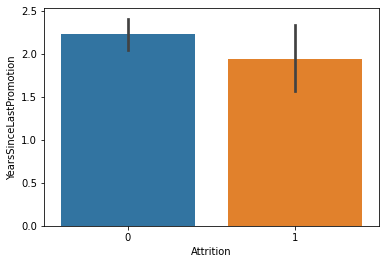

In [91]:
sns.barplot(x="Attrition",y="YearsSinceLastPromotion",data=df)

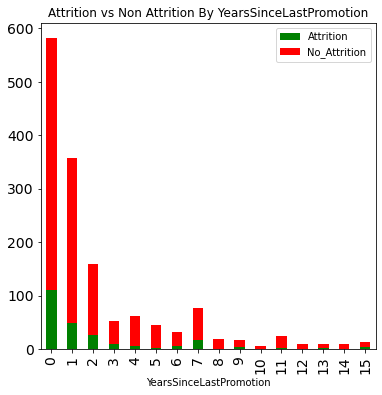

In [92]:
#YearsSinceLastPromotion
df.groupby('YearsSinceLastPromotion').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By YearsSinceLastPromotion");

Promotion is not a big factor for Attrition, we see very less employees leaving the organisation because they have not been promoted

In [93]:
#YearsWithCurrManager
df.groupby('YearsWithCurrManager').agg('sum')[['Attrition', 'No_Attrition','Total']]

,Attrition,No_Attrition,Total
YearsWithCurrManager,,,
0,85,178,263
1,11,65,76
2,50,294,344
3,19,123,142
4,11,87,98
5,4,27,31
6,4,25,29
7,31,185,216
8,10,97,107


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

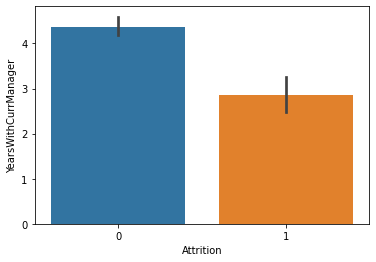

In [94]:
sns.barplot(x="Attrition",y="YearsWithCurrManager",data=df)

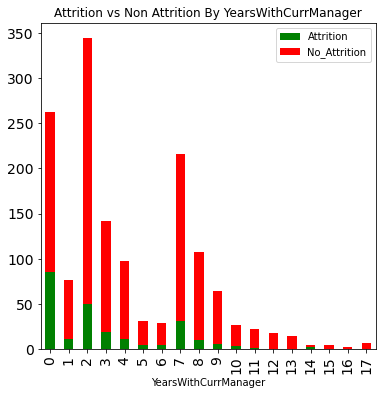

In [95]:
#YearsWithCurrManager
df.groupby('YearsWithCurrManager').agg('sum')[['Attrition', 'No_Attrition']].plot(kind='bar', figsize=(6,6),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Attrition vs Non Attrition By YearsWithCurrManager");

The employees who are associated with current manager for a good period of time rarely leave the organisation.

In [96]:
df.drop(columns=['No_Attrition','Total'],axis=1,inplace=True)

In [97]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [98]:
df_features=df.drop(columns=["Attrition"])
df_target=df[["Attrition"]]

In [99]:
df_features.shape, df_target.shape

((1470, 34), (1470, 1))

# Skweness

In [100]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':df_features.skew()}) 
skew_df

,Skewness
Age,0.413286
DailyRate,-0.003519
DistanceFromHome,0.958118
Education,-0.289681
EmployeeCount,0.000000
EmployeeNumber,0.016574
EnvironmentSatisfaction,-0.321654
HourlyRate,-0.032311
JobInvolvement,-0.498419
JobLevel,1.025401


In [101]:
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) ,"are skewed")

Out of 26 features 14 are skewed


In [102]:
skewed_feature=skew_df.iloc[(np.where(abs(skew_df['Skewness'])>0.5))]
skewed_feature

,Skewness
DistanceFromHome,0.958118
JobLevel,1.025401
MonthlyIncome,1.369817
NumCompaniesWorked,1.026471
PercentSalaryHike,0.821128
PerformanceRating,1.921883
StockOptionLevel,0.968980
TotalWorkingYears,1.117172
TrainingTimesLastYear,0.553124
WorkLifeBalance,-0.552480


In [103]:
for index in df_features.skew().index:
    if df_features.skew().loc[index]>0.5:
        df_features[index]=np.log1p(df_features[index])
    if df_features.skew().loc[index]<-0.5:
        df_features[index]=np.square(df_features[index])
print(df_features.skew())
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) 
      ,"is skewed and has improved skewness value than previous skewness values")

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Out of 26 features 3 is

So if we see, we have improved the skewness to a great extent now

# Categorical Columns

In [104]:
categorical_columns=[x for x in df_features.dtypes.index if df_features.dtypes[x]=='object']
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [105]:
set(df['BusinessTravel'])

{'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}

In [106]:
set(df['Department'])

{'Human Resources', 'Research & Development', 'Sales'}

In [107]:
set(df['EducationField'])

{'Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree'}

In [108]:
set(df['Gender'])

{'Female', 'Male'}

In [109]:
set(df['JobRole'])

{'Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative'}

In [110]:
set(df['MaritalStatus'])

{'Divorced', 'Married', 'Single'}

In [111]:
set(df['OverTime'])

{'No', 'Yes'}

In [112]:
set(df['Over18'])

{'Y'}

All employees are Over18, it will not contribute anything to us, Hence we can drop this column,

Also Employee number are the index, so we can delete them.

EmployeeCount and StandardHours have 0 standard deviation which means same values is present in each record. So lets delete both the columns.



In [113]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],inplace=True)

In [114]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5


In [115]:
df=pd.get_dummies(df,drop_first=True)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [116]:
df.head(1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [117]:
df.shape

(1470, 45)

In [118]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

[]

So we dont have any object datatye in our dataset

# HeatMap

<AxesSubplot:>

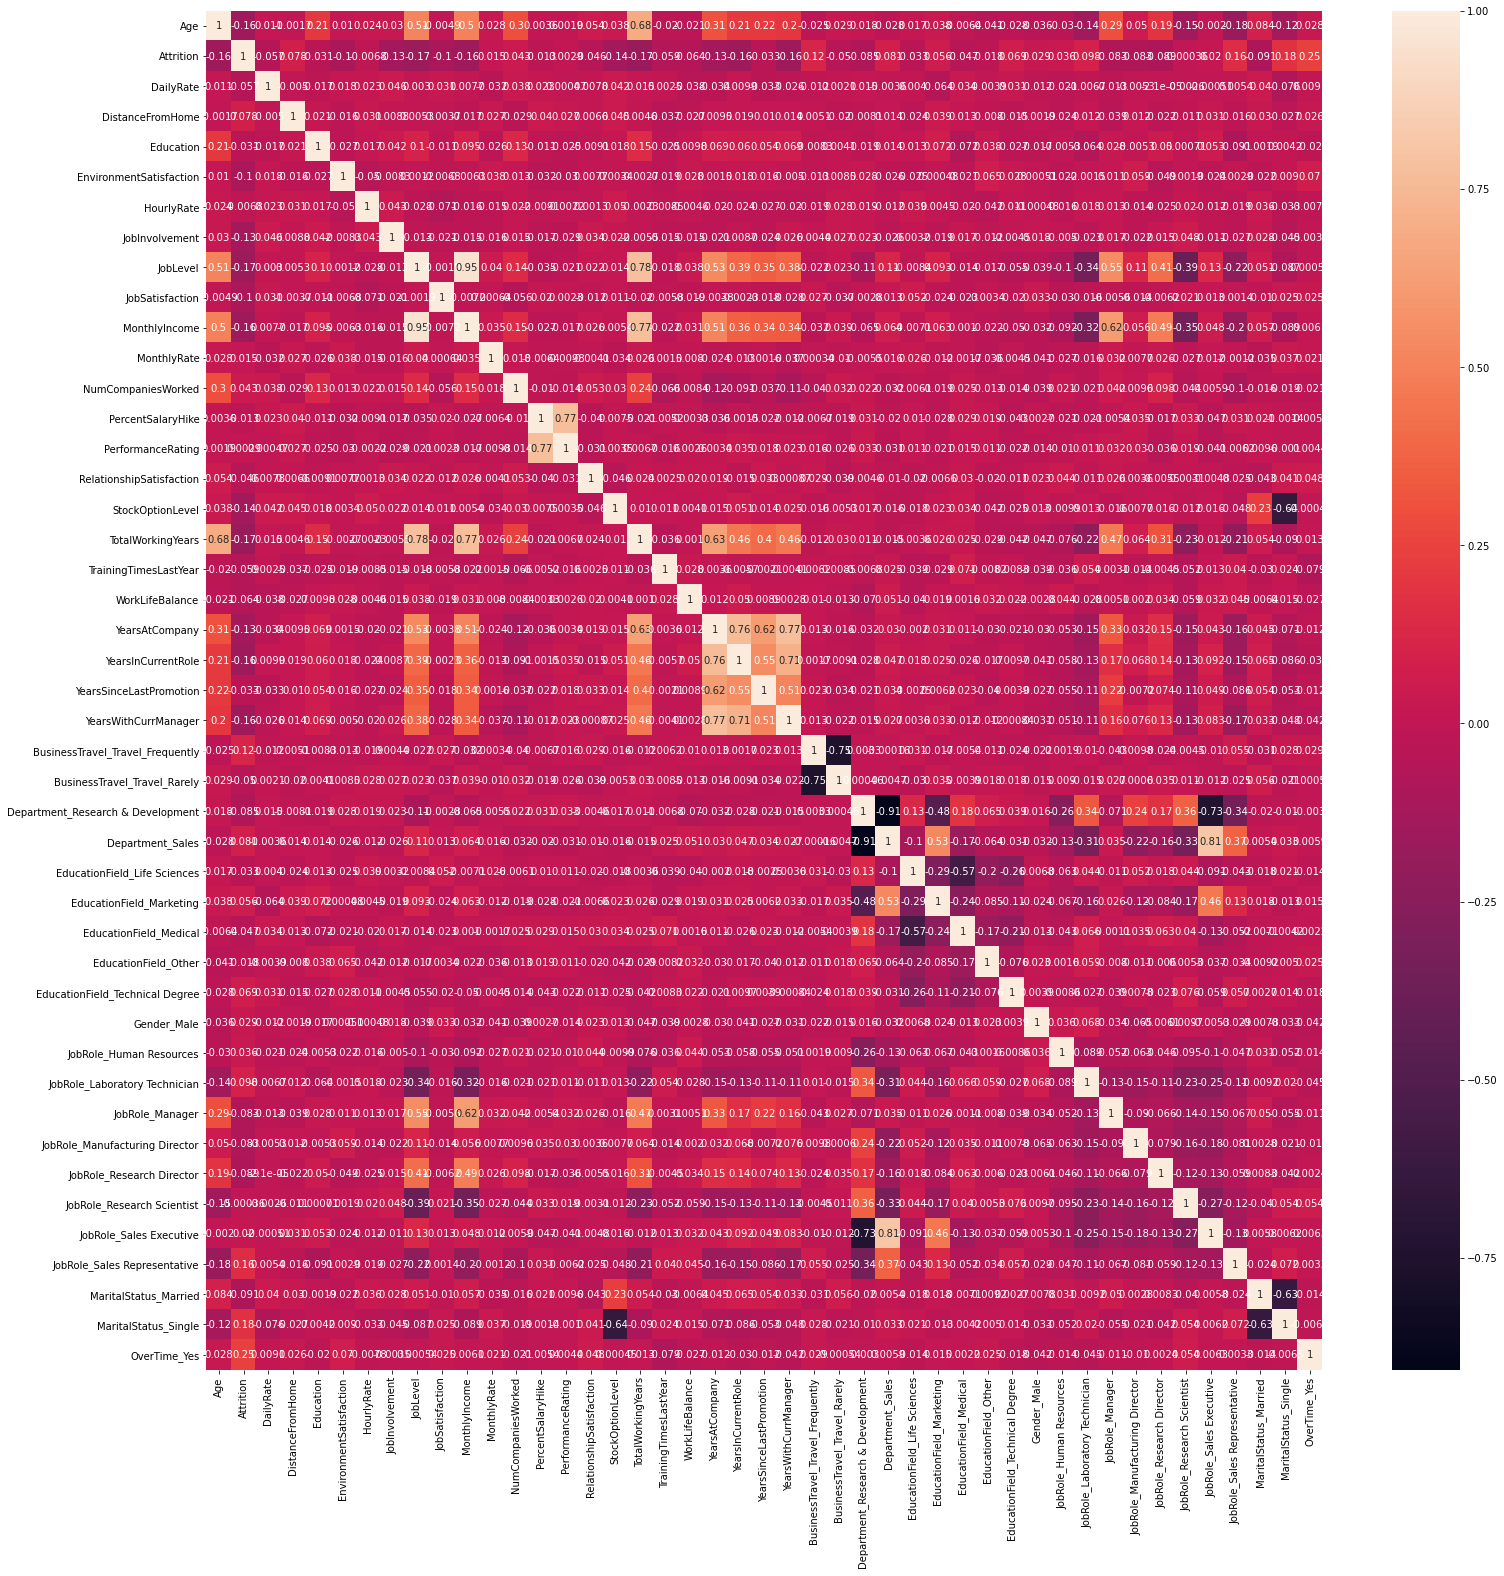

In [473]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)

We see some like YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearswithCurrentManager are correlated with each other

ALso we notice that Total working years is related to montly income and job role and Age.

Similarly Job role is related to Department.

Lets visualise this in tabular format.

In [119]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.024743,0.028791,0.017883,-0.027549,0.016824,0.038162,-0.006354,-0.041466,-0.027604,-0.036311,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.115143,-0.049538,-0.085293,0.080855,-0.032703,0.055781,-0.046999,-0.017898,0.069355,0.029453,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.090984,0.175419,0.246118
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.011776,0.002078,0.014871,-0.003616,0.004028,-0.064449,0.034202,-0.003893,0.030869,-0.011716,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835,0.009135
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.005081,-0.020116,-0.008117,0.014085,-0.024499,0.039294,0.013486,-0.007969,-0.014802,-0.001851,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445,0.025514
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.008292,0.004126,-0.018604,0.014215,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.016547,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.012624,0.008496,0.027976,-0.025606,-0.024526,0.000479,-0.021299,0.064602,0.027713,0.000508,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035,0.070132
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.018819,0.027541,0.018686,-0.012047,0.038759,0.004452,-0.020418,-0.042163,0.011283,-0.000478,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436,-0.007782
JobInvolvement,0.0298

# BoxPlot

In [120]:
dataToPlot=df.loc[:, df.columns != 'Attrition']
dataToPlot.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [121]:
dataToPlot.shape

(1470, 44)

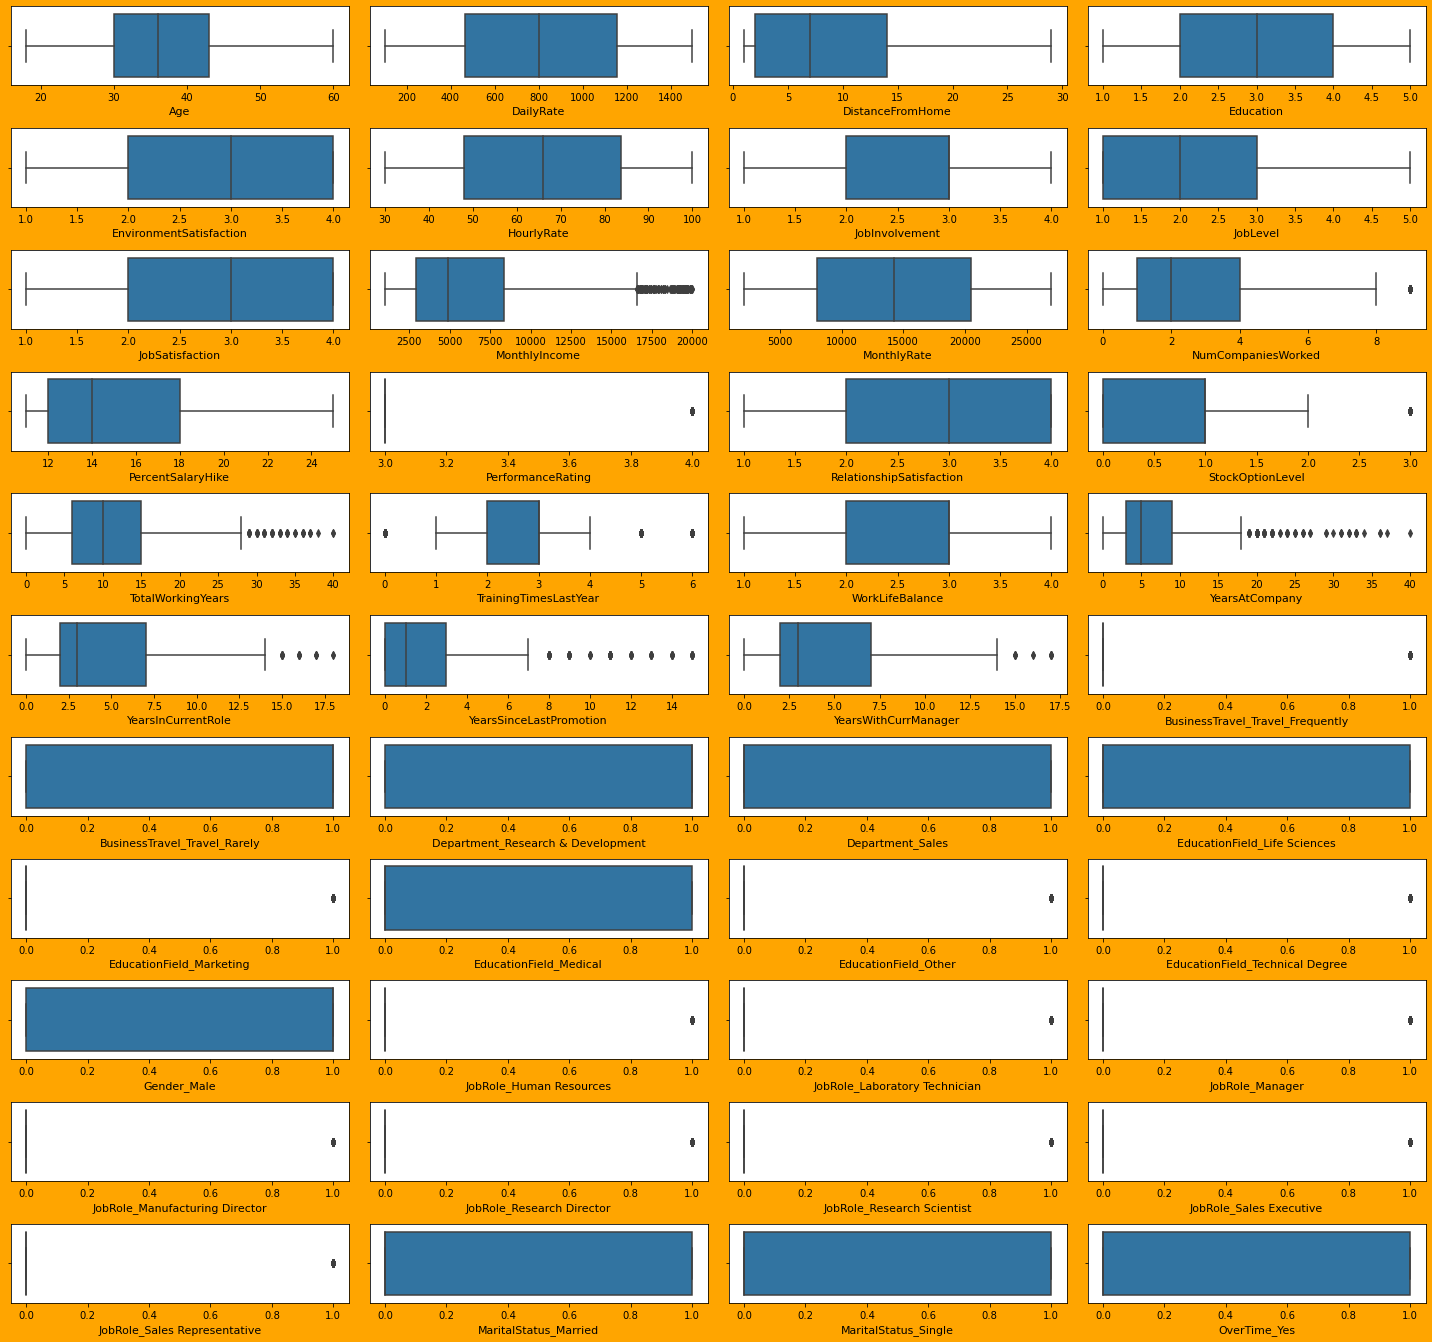

In [122]:
#Lets see data distribution
plt.figure(figsize=(20,20),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=48:
        ax=plt.subplot(12,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

There are few outliers in TotalWorkingYears,YearsAtCompany and training times last years and since we have converted the other categorical columns, Lets check zscore to see the percentage of outliers

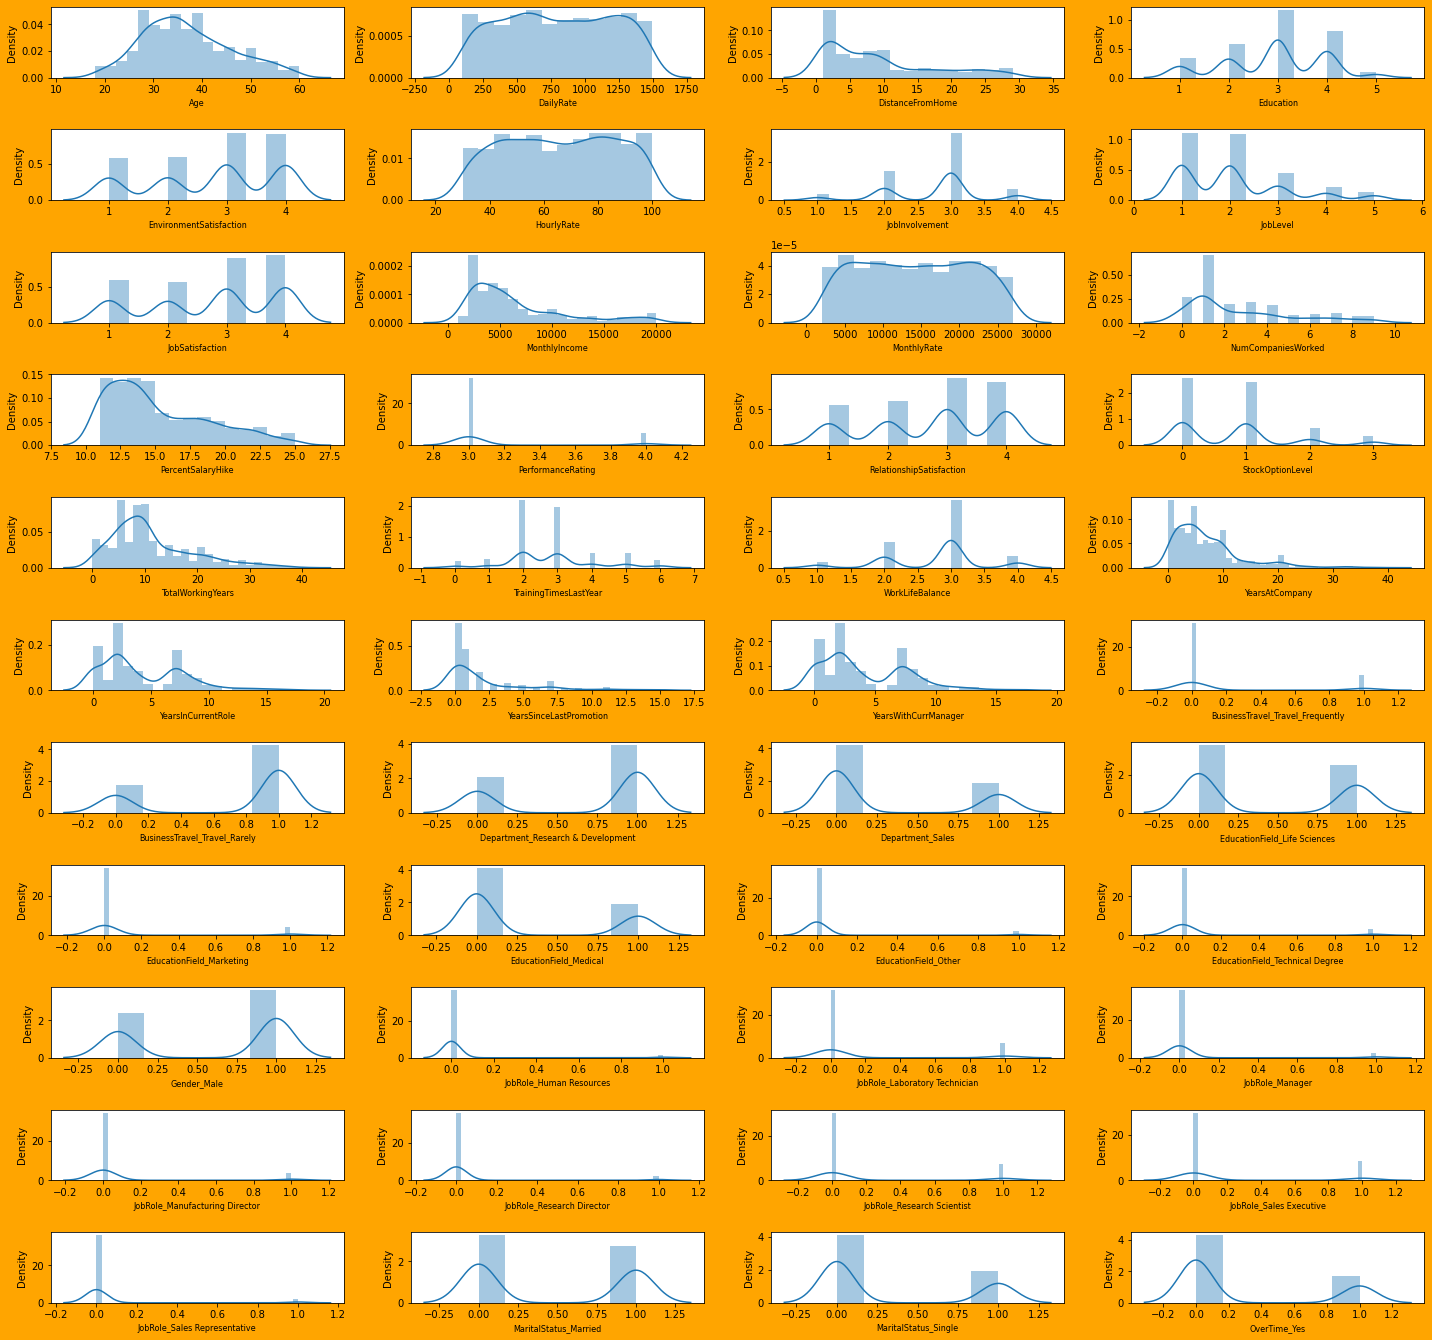

In [124]:
#Lets see data distribution again
plt.figure(figsize=(20,20),facecolor='orange')
plotnumber=1

for column in dataToPlot:
    #print(column)
    if plotnumber<=48:
        ax=plt.subplot(12,4,plotnumber)        
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=8)
        
    plotnumber+=1   
    
plt.tight_layout()

Distance from home, MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCUrrentRole,YearsWithCurrentManager and training times last years are skewed a bit right, others are normally distributed

# ZScore

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 45)

In [124]:
threshold=3
print(np.where(z>3))

(array([   2,    8,   15,   18,   20,   20,   21,   22,   25,   25,   28,
         29,   31,   33,   33,   36,   37,   40,   45,   45,   45,   51,
         55,   59,   60,   62,   62,   62,   63,   64,   64,   65,   66,
         75,   77,   77,   78,   79,   84,   85,   85,   86,   86,   95,
         95,   96,   98,   98,  100,  103,  105,  106,  110,  112,  116,
        117,  119,  123,  123,  123,  123,  125,  126,  126,  126,  127,
        128,  129,  134,  135,  136,  139,  142,  145,  147,  152,  153,
        155,  155,  156,  159,  165,  170,  171,  171,  178,  182,  184,
        186,  187,  187,  187,  188,  190,  190,  190,  192,  194,  197,
        198,  199,  199,  200,  200,  201,  211,  213,  214,  215,  217,
        218,  222,  222,  224,  226,  231,  231,  231,  231,  232,  233,
        235,  237,  237,  237,  238,  243,  244,  244,  245,  247,  249,
        250,  251,  255,  257,  262,  263,  263,  270,  270,  270,  271,
        275,  276,  278,  279,  280,  281,  283,  

In [125]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 45)
(832, 45)


In [126]:
loss_percentage= ((1470-832)/1470)*100
loss_percentage

43.40136054421769

We cant delete any data from here as we have 43% data as loss percentage, so we will continue further with Standard Scaler and model building

# Standard Scaler

In [139]:
df_features=df
df_features.head(1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [140]:
df_features=df_features.drop(columns=["Attrition"])

In [141]:
y=df[["Attrition"]]
y.head(2)

,Attrition
0,1
1,0


In [142]:
df_features.head(1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

In [164]:
X_vif=df
X_vif.head(1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [165]:
x.shape , X_vif.shape

((1470, 45), (1470, 45))

In [166]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,2.093383,Age
1,1.347084,Attrition
2,1.036063,DailyRate
3,1.031315,DistanceFromHome
4,1.083597,Education
5,1.049590,EnvironmentSatisfaction
6,1.026897,HourlyRate
7,1.049471,JobInvolvement
8,14.140403,JobLevel
9,1.041674,JobSatisfaction


We don't see any complex multicollinearity problem in our data. However we see Department_Sales and Department_Research & Development have multicollinearity issue as they are highly correlated. Lets drop one of them say Department_Sales to resolve the multicolliearity issues

In [168]:
#df.drop(columns=['Department_Research & Development'],axis=1,inplace=True)

In [169]:
df.head(1)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [170]:
x=sc.fit_transform(df)

In [171]:
X_vif=df
print(X_vif.shape)

(1470, 45)


In [172]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,2.093383,Age
1,1.347084,Attrition
2,1.036063,DailyRate
3,1.031315,DistanceFromHome
4,1.083597,Education
5,1.049590,EnvironmentSatisfaction
6,1.026897,HourlyRate
7,1.049471,JobInvolvement
8,14.140403,JobLevel
9,1.041674,JobSatisfaction


We see that there is a drastic change in variation inflation factor for Department_Sales column and now we will proceed with model building

In [173]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [184]:
sc.fit(df_features)
x=sc.transform(df_features)
x=pd.DataFrame(x,columns=df_features.columns)

In [185]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

# Dividing the Dataset into Features and Target

# Feature Importance

In [186]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(x,y)

RandomForestRegressor()

In [187]:
print(feature_rf.feature_importances_)

[0.06458847 0.06392432 0.05278188 0.01607397 0.03292923 0.04720875
 0.02593596 0.01384686 0.02288136 0.0962894  0.04742939 0.03583826
 0.02801127 0.00228672 0.02072682 0.02987413 0.05386343 0.02639619
 0.02594786 0.03405658 0.01776965 0.02493329 0.02389213 0.01460776
 0.00451257 0.00499382 0.00729741 0.0030854  0.00684013 0.00446693
 0.00378262 0.00800251 0.0070762  0.00308735 0.00902716 0.00071029
 0.00294128 0.00056092 0.0081475  0.01126755 0.00506184 0.00416828
 0.01738339 0.06549313]


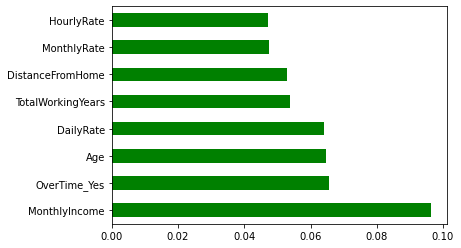

In [188]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=x.columns)
featureImportance.nlargest(8).plot(kind='barh',color="green") # Lets plot for 8 features 
plt.show()

The most important eight feature is Monyhly income followed by Overtime_Yes,DailyRate,Age,TotalWrokingYears,DistanceFromHome,HorlyRate and MonthlyRate

# Model Building 

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix

Lets define a function now and use the same function everywhere to check the roc_auc score

In [190]:
from imblearn.over_sampling import SMOTE

def get_aucroc_score(model,x,y):
    max_aucroc_score=0
    for i in range(45,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=i)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        aucroc=roc_auc_score(y_test,pred_test)
        print("At",i," aucroc score is ",aucroc)
        if aucroc>max_aucroc_score:
            max_aucroc_score=aucroc
            final_i=i
    print("At",final_i,"max roc auc score is :",max_aucroc_score)
    return final_i

# LogisticRegression

In [191]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [192]:
get_aucroc_score(lgr,x,y)

At 45  aucroc score is  0.7593826337996891
At 46  aucroc score is  0.7636554621848739
At 47  aucroc score is  0.7288744740532959
At 48  aucroc score is  0.7566056910569107
At 49  aucroc score is  0.7505081300813008
At 50  aucroc score is  0.7307993423627965
At 51  aucroc score is  0.7305399719495093
At 52  aucroc score is  0.7361111111111112
At 53  aucroc score is  0.7455758361901231
At 54  aucroc score is  0.7795918367346938
At 55  aucroc score is  0.7490950226244344
At 56  aucroc score is  0.7210365853658537
At 57  aucroc score is  0.7970472440944882
At 58  aucroc score is  0.7149455883504267
At 59  aucroc score is  0.7904978962131837
At 60  aucroc score is  0.8136885245901638
At 61  aucroc score is  0.6717479674796748
At 62  aucroc score is  0.7179597588663588
At 63  aucroc score is  0.7787492462744423
At 64  aucroc score is  0.8024545454545454
At 65  aucroc score is  0.6914446002805049
At 66  aucroc score is  0.7566619915848527
At 67  aucroc score is  0.736111111111111
At 68  aucro

60

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=60,test_size=0.20)

In [201]:
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
r2_final_scoreLR=r2_score(y_test,pred_test)

In [202]:
print("rocauc_score",rocauc_scoreLR)

rocauc_score 0.8157377049180328


In [211]:
from sklearn.pipeline import make_pipeline
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression() )
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
clfLR_cvScore=(np.mean(scores))
clfLR_cvScore

Cross Validation accuracy: 0.799 +/- 0.024


0.7992929292929292

In [212]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       244
           1       0.47      0.82      0.60        50

    accuracy                           0.81       294
   macro avg       0.71      0.82      0.74       294
weighted avg       0.87      0.81      0.83       294

Confusion Matrix
 [[198  46]
 [  9  41]]


array([[198,  46],
       [  9,  41]], dtype=int64)

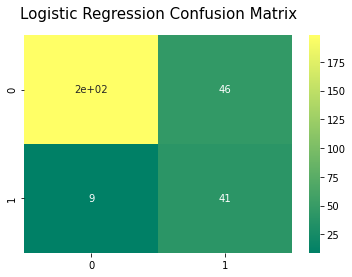

In [213]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)
cm

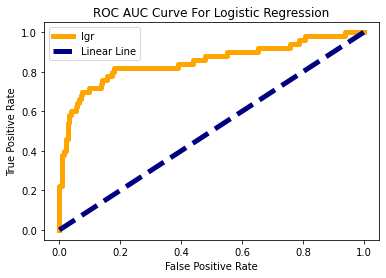

In [214]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [215]:
clfLR_data = {'Model': ['Logistic Regression'],            
             'ROC_AUC Score': rocauc_scoreLR,
             'CV Score': clfLR_cvScore
            }

clf_LR_df = pd.DataFrame(clfLR_data)  
clf_LR_df

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.815738,0.799293


# KNeighborsClassifier

In [216]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier() 

In [217]:
params={'n_neighbors':list(range(1,35)) ,
        'leaf_size':list(range(1,15)) ,
        'weights':['uniform'],
        'p':[1,2]
        }
params

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'weights': ['uniform'],
 'p': [1, 2]}

In [185]:
gsv = GridSearchCV(knn, params, cv=5,scoring="roc_auc") 
gsv.fit(features,target) 
gsv.best_params_

{'leaf_size': 1, 'n_neighbors': 33, 'p': 1, 'weights': 'uniform'}

In [219]:
knn=KNeighborsClassifier(n_neighbors=33, leaf_size=1,p=1,weights='uniform' )
get_aucroc_score(knn,x,y)

At 45  aucroc score is  0.6778814123917388
At 46  aucroc score is  0.7111344537815126
At 47  aucroc score is  0.6144810659186537
At 48  aucroc score is  0.7627032520325204
At 49  aucroc score is  0.6824186991869918
At 50  aucroc score is  0.6796758788068582
At 51  aucroc score is  0.6499824684431977
At 52  aucroc score is  0.6884920634920635
At 53  aucroc score is  0.725331233206708
At 54  aucroc score is  0.7571428571428571
At 55  aucroc score is  0.7113122171945702
At 56  aucroc score is  0.6768292682926829
At 57  aucroc score is  0.6944881889763779
At 58  aucroc score is  0.6951381821028733
At 59  aucroc score is  0.697054698457223
At 60  aucroc score is  0.7093442622950821
At 61  aucroc score is  0.6720020325203251
At 62  aucroc score is  0.6981523526188053
At 63  aucroc score is  0.7235334654147644
At 64  aucroc score is  0.6728181818181819
At 65  aucroc score is  0.6551542776998598
At 66  aucroc score is  0.6889901823281908
At 67  aucroc score is  0.6428571428571428
At 68  aucroc

93

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=93)
knn=KNeighborsClassifier(n_neighbors=33, leaf_size=1,p=1,weights='uniform' )

In [231]:
from sklearn.metrics import roc_curve, auc
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
rocauc_scoreKNN=roc_auc_score(y_test,pred_test)
r2_final_scoreKNN=r2_score(y_test,pred_test)

In [232]:
rocauc_scoreKNN

0.7423025435073628

In [519]:
clfKNN_cvScore=cross_val_score(knn,features,target,cv=5,scoring='roc_auc').mean()
clfKNN_cvScore

0.6421407806145638

In [233]:
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=33, leaf_size=1,p=1,weights='uniform'))
#
# Pass instance of pipeline and training and test data set
# cv=3 represents the StratifiedKFold with 3 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=3, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
clfKNN_cvScore=(np.mean(scores))
clfKNN_cvScore

Cross Validation accuracy: 0.776 +/- 0.018


0.7764227642276422

In [234]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       249
           1       0.32      0.78      0.46        45

    accuracy                           0.72       294
   macro avg       0.64      0.74      0.63       294
weighted avg       0.85      0.72      0.76       294

Confusion Matrix
 [[176  73]
 [ 10  35]]


array([[176,  73],
       [ 10,  35]], dtype=int64)

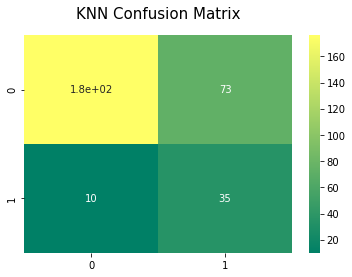

In [235]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('KNN Confusion Matrix', y=1.05, size=15)
cm

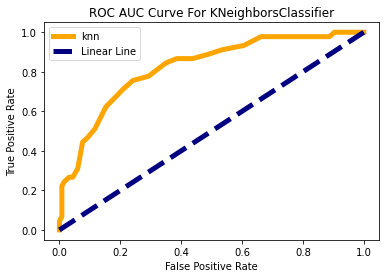

In [236]:
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='knn',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For KNeighborsClassifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [237]:
clfKNN_data = {'Model': ['KNeighborsClassifier'],            
             'ROC_AUC Score': rocauc_scoreKNN,
             'CV Score': clfKNN_cvScore
            }

clf_KNN_df = pd.DataFrame(clfKNN_data)  
clf_KNN_df

,Model,ROC_AUC Score,CV Score
0,KNeighborsClassifier,0.742303,0.776423


# Decision Tree Classifier

In [238]:
from sklearn.tree import DecisionTreeClassifier

In [239]:
# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [240]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [242]:
decTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=10)
get_aucroc_score(decTree,x,y)

At 45  aucroc score is  0.634576948700866
At 46  aucroc score is  0.6313025210084034
At 47  aucroc score is  0.6049263674614306
At 48  aucroc score is  0.6262703252032521
At 49  aucroc score is  0.669969512195122
At 50  aucroc score is  0.5939873169967901
At 51  aucroc score is  0.6649719495091163
At 52  aucroc score is  0.5873015873015873
At 53  aucroc score is  0.630269619197628
At 54  aucroc score is  0.6306122448979592
At 55  aucroc score is  0.5746606334841629
At 56  aucroc score is  0.5891768292682927
At 57  aucroc score is  0.6298228346456693
At 58  aucroc score is  0.5656854302043373
At 59  aucroc score is  0.6311360448807855
At 60  aucroc score is  0.5926229508196722
At 61  aucroc score is  0.6521849593495935
At 62  aucroc score is  0.5624755343302278
At 63  aucroc score is  0.6049185976397622
At 64  aucroc score is  0.6225454545454545
At 65  aucroc score is  0.61421809256662
At 66  aucroc score is  0.5916900420757364
At 67  aucroc score is  0.5892857142857143
At 68  aucroc sc

99

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=99)
decTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=10)

In [244]:
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTree.fit(x_train,y_train)
pred_train=decTree.predict(x_train)
pred_test=decTree.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
r2_final_scoreTree=r2_score(y_test,pred_test)

In [245]:
rocauc_scoreTree

0.6420057215511761

In [252]:
clfTree_cvScore=cross_val_score(decTree,x,y,cv=6,scoring='roc_auc').mean()
clfTree_cvScore

0.6539914990356027

In [253]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       242
           1       0.42      0.40      0.41        52

    accuracy                           0.80       294
   macro avg       0.65      0.64      0.64       294
weighted avg       0.79      0.80      0.79       294

Confusion Matrix
 [[213  29]
 [ 31  21]]


array([[213,  29],
       [ 31,  21]], dtype=int64)

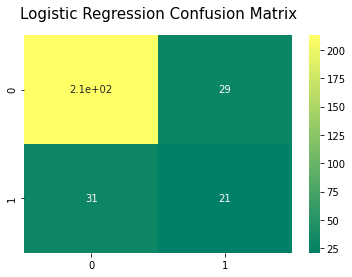

In [254]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)
cm

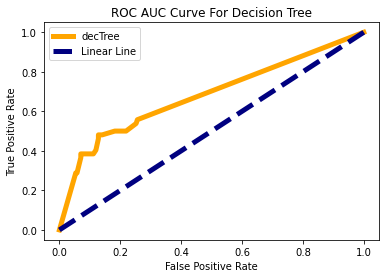

In [255]:
fpr, tpr, thresholds = roc_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='decTree',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decision Tree")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [256]:
clfTree_data = {'Model': ['Decison Tree Classifier'],            
             'ROC_AUC Score': rocauc_scoreTree,
             'CV Score': clfTree_cvScore
            }

clf_Tree_df = pd.DataFrame(clfTree_data)  
clf_Tree_df

,Model,ROC_AUC Score,CV Score
0,Decison Tree Classifier,0.642006,0.653991


# Naive Bye Classification

In [257]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
get_aucroc_score(nb,x,y)

At 45  aucroc score is  0.6028203419942261
At 46  aucroc score is  0.6302521008403361
At 47  aucroc score is  0.5542601683029453
At 48  aucroc score is  0.6641260162601625
At 49  aucroc score is  0.6371951219512195
At 50  aucroc score is  0.6161434275424724
At 51  aucroc score is  0.6175490883590462
At 52  aucroc score is  0.6626984126984127
At 53  aucroc score is  0.6167886593162235
At 54  aucroc score is  0.6612244897959184
At 55  aucroc score is  0.6335972850678733
At 56  aucroc score is  0.6333841463414634
At 57  aucroc score is  0.6578740157480315
At 58  aucroc score is  0.5950050888593126
At 59  aucroc score is  0.6573457223001402
At 60  aucroc score is  0.6354098360655737
At 61  aucroc score is  0.5835873983739837
At 62  aucroc score is  0.5938698817818837
At 63  aucroc score is  0.6446291670255836
At 64  aucroc score is  0.6124545454545455
At 65  aucroc score is  0.6026472650771388
At 66  aucroc score is  0.6191269284712483
At 67  aucroc score is  0.5714285714285714
At 68  aucr

48

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=48,test_size=0.20)
nb=GaussianNB()

In [260]:
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)

In [547]:
rocauc_scoreNB

0.7102910238429172

In [265]:
pipeline = make_pipeline(StandardScaler(), GaussianNB() )
#
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
clfNB_cvScore=(np.mean(scores))
clfNB_cvScore

Cross Validation accuracy: 0.667 +/- 0.037


0.6671875602390285

In [266]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.57      0.70       246
           1       0.25      0.75      0.38        48

    accuracy                           0.60       294
   macro avg       0.59      0.66      0.54       294
weighted avg       0.81      0.60      0.65       294

Confusion Matrix
 [[139 107]
 [ 12  36]]


array([[139, 107],
       [ 12,  36]], dtype=int64)

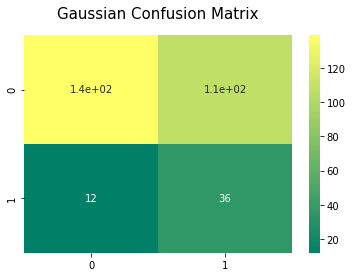

In [267]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Gaussian Confusion Matrix', y=1.05, size=15)
cm

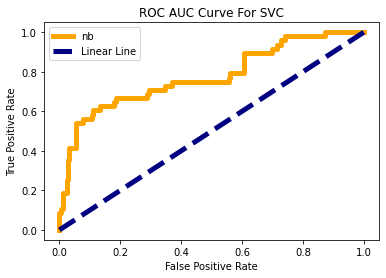

In [268]:
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='nb',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For SVC")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [269]:
clfNB_data = {'Model': ['Gaussian NB'],            
             'ROC_AUC Score': rocauc_scoreNB,
             'CV Score': clfNB_cvScore
            }

clf_NB_df = pd.DataFrame(clfNB_data)  
clf_NB_df

,Model,ROC_AUC Score,CV Score
0,Gaussian NB,0.65752,0.667188


# Random Forest Classifier

In [270]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [277]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [271]:
forest=RandomForestClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 5,min_samples_split=10, n_estimators=150)
get_aucroc_score(forest,x,y)

At 45  aucroc score is  0.6259160559626915
At 46  aucroc score is  0.6785714285714286
At 47  aucroc score is  0.613078541374474
At 48  aucroc score is  0.6420223577235772
At 49  aucroc score is  0.6816565040650406
At 50  aucroc score is  0.5986847255930479
At 51  aucroc score is  0.6360448807854138
At 52  aucroc score is  0.6984126984126985
At 53  aucroc score is  0.6122950060224219
At 54  aucroc score is  0.6551020408163265
At 55  aucroc score is  0.6572398190045249
At 56  aucroc score is  0.6981707317073171
At 57  aucroc score is  0.6553149606299212
At 58  aucroc score is  0.6186878571987787
At 59  aucroc score is  0.6658485273492287
At 60  aucroc score is  0.6359016393442624
At 61  aucroc score is  0.6382113821138211
At 62  aucroc score is  0.6667971502387848
At 63  aucroc score is  0.6666810233439573
At 64  aucroc score is  0.6524545454545454
At 65  aucroc score is  0.6469144460028051
At 66  aucroc score is  0.6686535764375876
At 67  aucroc score is  0.6607142857142857
At 68  aucro

83

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=83)
forest=RandomForestClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 5,min_samples_split=10, n_estimators=150)

In [273]:
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
forest.fit(x_train,y_train)
pred_test=forest.predict(x_test)
rocauc_scoreForest=roc_auc_score(y_test,pred_test)

In [274]:
rocauc_scoreForest

0.6879518072289157

In [280]:
clfForest_cvScore=cross_val_score(forest,x,y,cv=5,scoring='roc_auc').mean()
clfForest_cvScore

0.8074966220956032

In [281]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       249
           1       0.75      0.40      0.52        45

    accuracy                           0.89       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix
 [[243   6]
 [ 27  18]]


array([[243,   6],
       [ 27,  18]], dtype=int64)

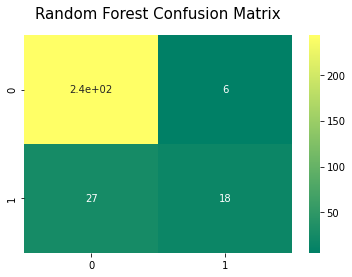

In [296]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Random Forest Confusion Matrix', y=1.05, size=15)
cm

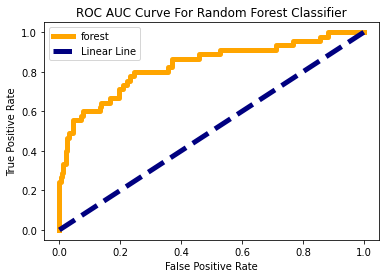

In [283]:
fpr, tpr, thresholds = roc_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='forest',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [284]:
clfForest_data = {'Model': ['RandomForestClassifier'],            
             'ROC_AUC Score': rocauc_scoreForest,
             'CV Score': clfForest_cvScore
            }

clf_Forest_df = pd.DataFrame(clfForest_data)  
clf_Forest_df

,Model,ROC_AUC Score,CV Score
0,RandomForestClassifier,0.687952,0.807497


In [285]:
modelDF=pd.concat([clf_LR_df,clf_KNN_df,clf_Tree_df,clf_NB_df,clf_Forest_df]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.815738,0.799293
1,KNeighborsClassifier,0.742303,0.776423
2,Decison Tree Classifier,0.642006,0.653991
3,Gaussian NB,0.657520,0.667188
4,RandomForestClassifier,0.687952,0.807497


So Logistic Regression is our best model as positive difference of ROC_AUC score is best for this model, also ROC_AUC Score is highest for this model, hence we will select the Logistic Regression model for our problem

In [286]:
#Predicting the test cases
predict_HRAnalytics = pd.DataFrame( { 'actual':  y_test,
                                      'predicted': lgr.predict( x_test),
                                      'Correctly_Predicted':(y_test)-(lgr.predict(x_test))
                                    } )

In [287]:
predict_HRAnalytics

,actual,predicted,Correctly_Predicted
0,0,0,0
1,0,1,-1
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
289,0,0,0
290,0,0,0
291,0,0,0
292,0,0,0


In [288]:
predict_HRAnalytics = predict_HRAnalytics.reset_index()

In [289]:
predict_HRAnalytics['Correctly_Predicted'].value_counts()

 0    239
-1     45
 1     10
Name: Correctly_Predicted, dtype: int64

So, out of 294 records, 249 predicted correctly, hence our model is 84% accurate, Hence,we will save this model

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

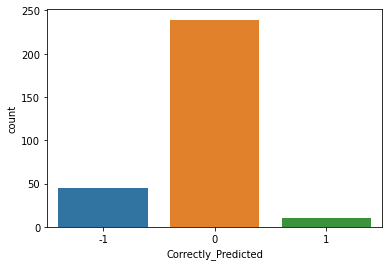

In [291]:
sns.countplot(predict_HRAnalytics.Correctly_Predicted)

# Saving the model

In [292]:
from joblib import dump , load
dump(lgr,'HR_Analytics.joblib')
lgr_load=load('HR_Analytics.joblib')

In [293]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'HR_Analytics.joblib')

In [294]:
import joblib
joblib.dump(lgr, filename) 
#['...HR_Analytics.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpw8fkjd7j\\HR_Analytics.joblib']

In [295]:
joblib.load(filename)

LogisticRegression()